In [1]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def display(image, flip=True, cmap=None, figsize=(6, 6), **kwargs):
    if flip:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # image.shape = (hieght, width, channels)
    width=image.shape[1] 
    height=image.shape[0]
    margin=50 
    # dots per inch
    dpi=100.
    # inches
    figsize=((width+2*margin)/dpi, (height+2*margin)/dpi)
    #axes ratio
    left = margin/dpi/figsize[0] 
    bottom = margin/dpi/figsize[1]
    fig = plt.figure(figsize=figsize, dpi=dpi)
    fig.subplots_adjust(left=left, bottom=bottom, right=1.-left, top=1.-bottom)
    # plt.figure(figsize=(6, 6))
    _ = plt.imshow(image, cmap=cmap)
    plt.title(kwargs.get("title", None))
    plt.axis("off")

### Goals for Lighting Conditions in images

**High Contrast**
Maximize the contrast between the Regions of Interest in your image (i.e. the “objects” you want to detect, extract, describe classify, manipulate, etc. should have sufficiently high contrast from the rest of the image so they are easily detectable).

**Generalizable**
Your lighting conditions should be consistent enough that they work well from one “object” to the next. If our goal is to identify various United States coins in an image, our lighting conditions should be generalizable enough to facilitate in the coin identification, whether we are examining a penny, nickel, dime, or quarter.

**Stable**
Having stable, consistent, and repeatable lighting conditions is the holy grail of computer vision application development. However, it’s often hard (if not impossible) to guarantee — this is especially true if we are developing computer vision algorithms that are intended to work in outdoor lighting conditions. As the time of day changes, clouds roll in over the sun, and rain starts to pour, our lighting conditions will obviously change.


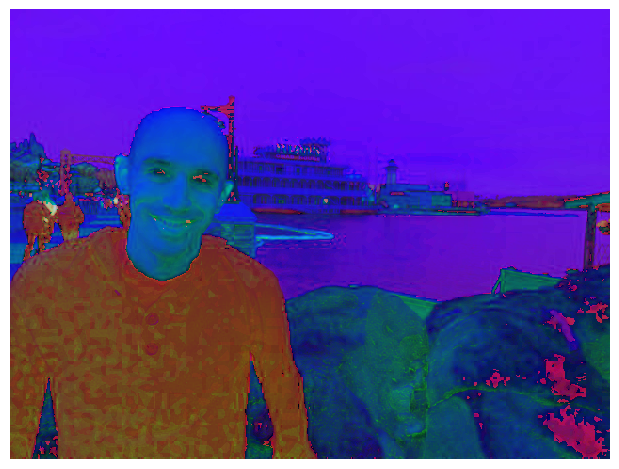

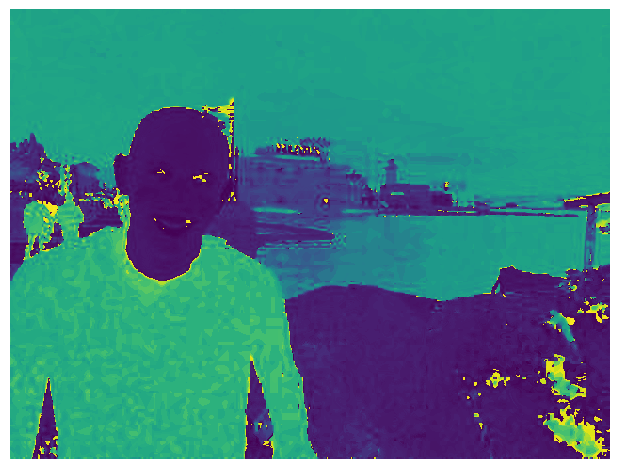

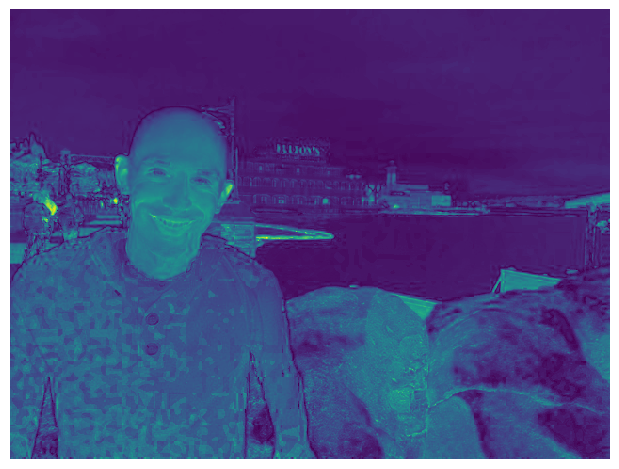

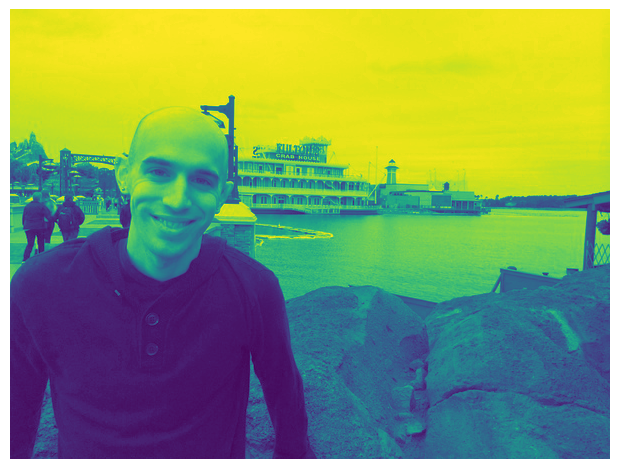

In [13]:
image = cv2.imread("images/florida_trip.png")
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
H, S, V = cv2.split(hsv)
display(hsv, flip=False, cmap="hsv")
display(H, flip=False)
display(S, flip=False)
display(V, flip=False)

### Thresholding

#### Simple Thresholding

Applying simple thresholding methods requires human intervention. We must specify a threshold value T. All pixel intensities below T are set to 255. And all pixel intensities greater than T are set to 0 (like in the example above).

We could also apply the inverse of this binarization by setting all pixels greater than T to 255 and all pixel intensities below T to 0.

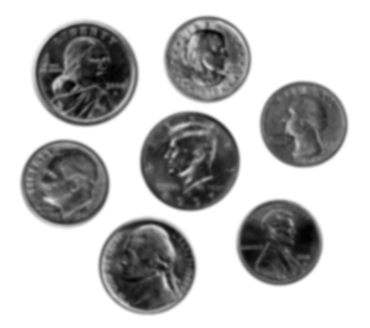

In [45]:
image = cv2.imread("images/coins01.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (7, 7), 0)
display(blur, flip=False, cmap="gray")

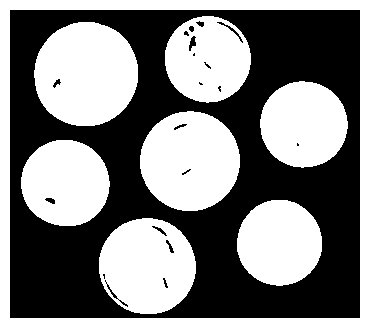

In [49]:
## inverse Thresholding
# if a pixel value is greater than our threshold (in this case, 200), we set it to be BLACK, otherwise it is WHITE.
(T, threshold_inv) = cv2.threshold(blur, 200, 255, cv2.THRESH_BINARY_INV)
display(threshold_inv, flip=False, cmap="gray")

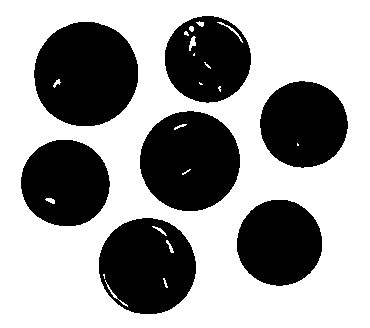

In [51]:
## normal Thresholding 
# we can change the last argument in the function to make the coins
# black rather than white.

(T, threshold) = cv2.threshold(blur, 200, 255, cv2.THRESH_BINARY)
display(threshold, flip=False, cmap="gray")

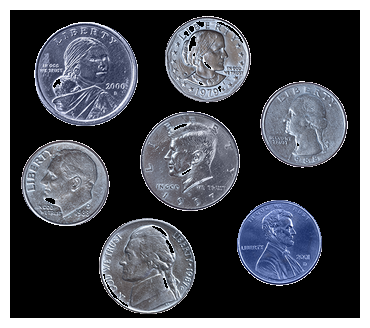

In [52]:
# finally mask the image by doing bitwise and

masked = cv2.bitwise_and(image, image, mask=threshold_inv)
display(masked, flip=False, cmap="gray")